In [1]:
import sys
sys.path.append('../ml_utils')

import config as cfg
import data_utils as du
import timeit
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler 

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
log_data = './../shared/data/swissid_authorize_logs_april_to_sept_2019.csv'

start = timeit.default_timer()
df = pd.read_csv(filepath_or_buffer=log_data, header=0, sep='\t', names=cfg.complete_feature_list, index_col=None)
stop = timeit.default_timer()

print("Original data frame size: {}\n".format(df.shape))
print("Time: {} seconds\n".format(stop - start))

Original data frame size: (12417597, 31)

Time: 54.853625017 seconds



In [4]:
df = du.clean_data(df)
#df = utils.minimize_dataframe(df)

print("data frame size: {}\n".format(df.shape))
#display(df)

columns with NaN: loc_country_code
loc_country_code is fixed
data frame size: (12204748, 31)



In [5]:
excludes=['time_stamp', 'label', 'ido_email', 'response_time_cat', 'client_name', 'src_ip', 'ido_type', 'ido_id']

sample_df, label_df = du.build_balanced_sample_df(df, 20000, True, True, True, False, excludes)

In [6]:
#sample_df.describe()

Time: 48.139078651000005 seconds



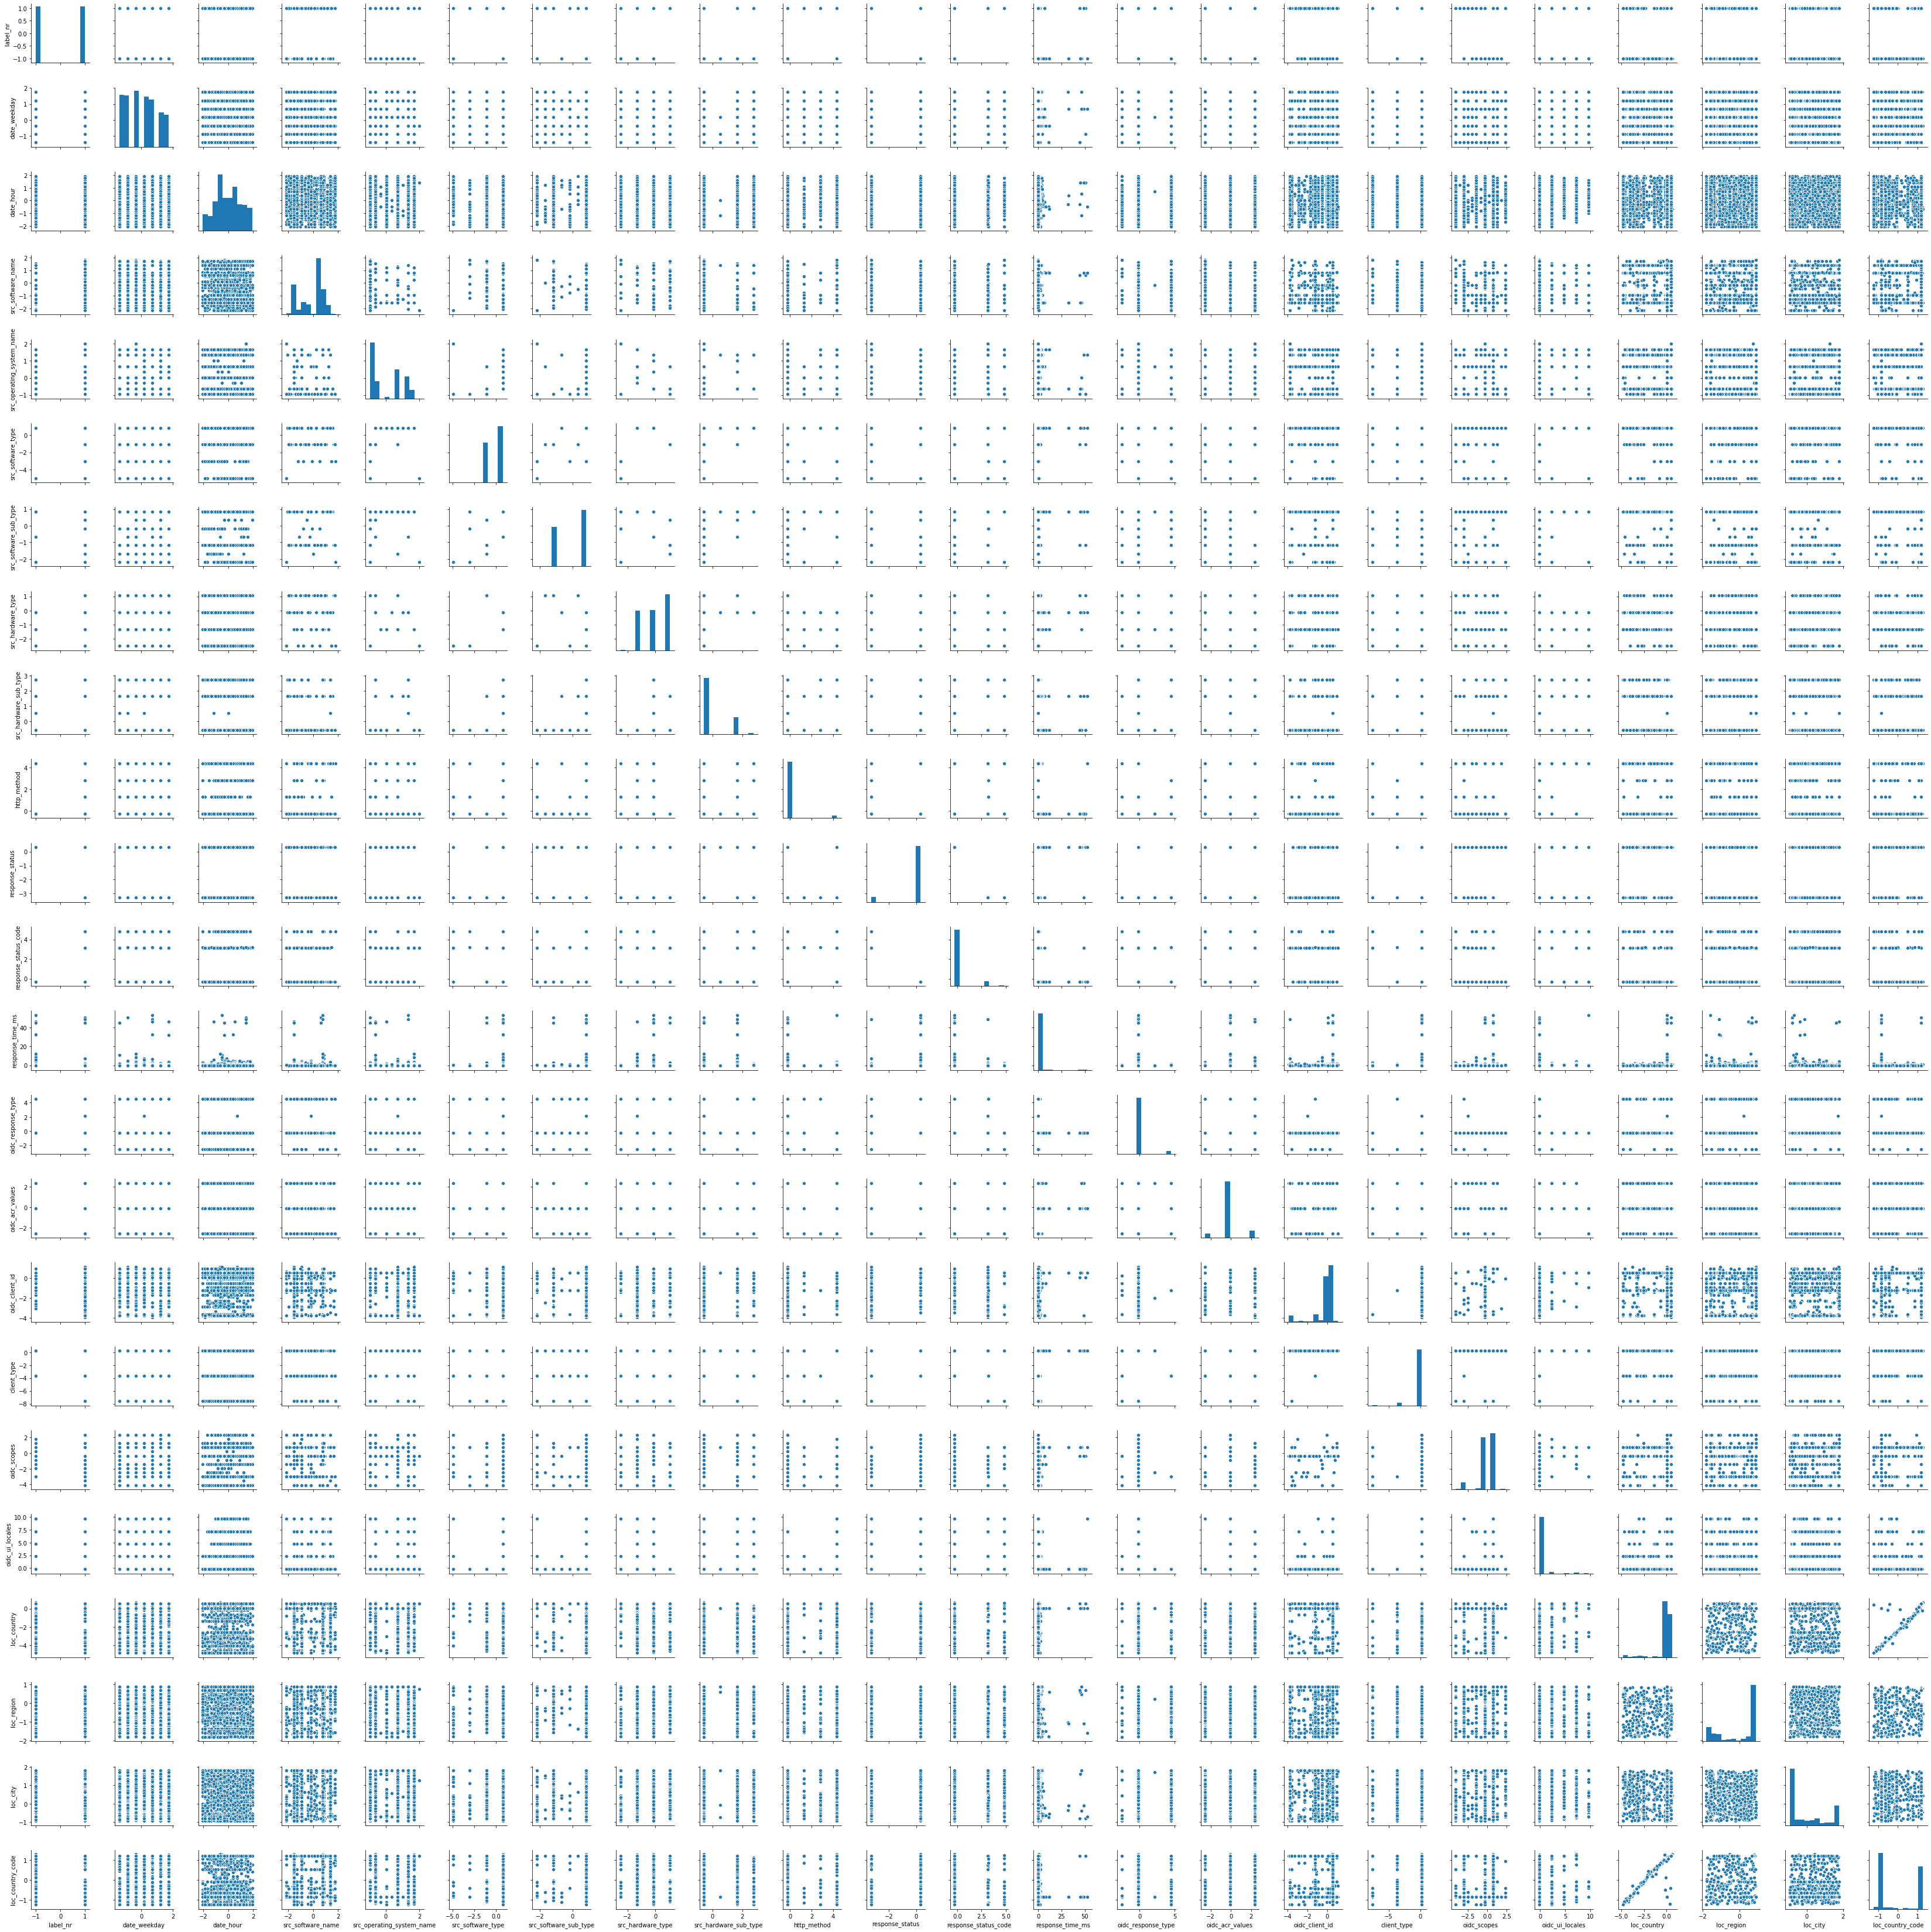

In [7]:
start = timeit.default_timer()
sns.pairplot(sample_df, height=2.0) #, hue = 'date_weekday')
stop = timeit.default_timer()

print("Time: {} seconds\n".format(stop - start))

In [9]:
sample_df, label_df = du.build_balanced_sample_df(df, 20000, True, True, False, False, excludes)

In [10]:
from sklearn.preprocessing import StandardScaler 

stdsc = StandardScaler() 
X_std = stdsc.fit_transform(sample_df[sample_df.columns].iloc[:,range(0,len(sample_df.columns))].values)

cov_mat =np.cov(X_std.T)

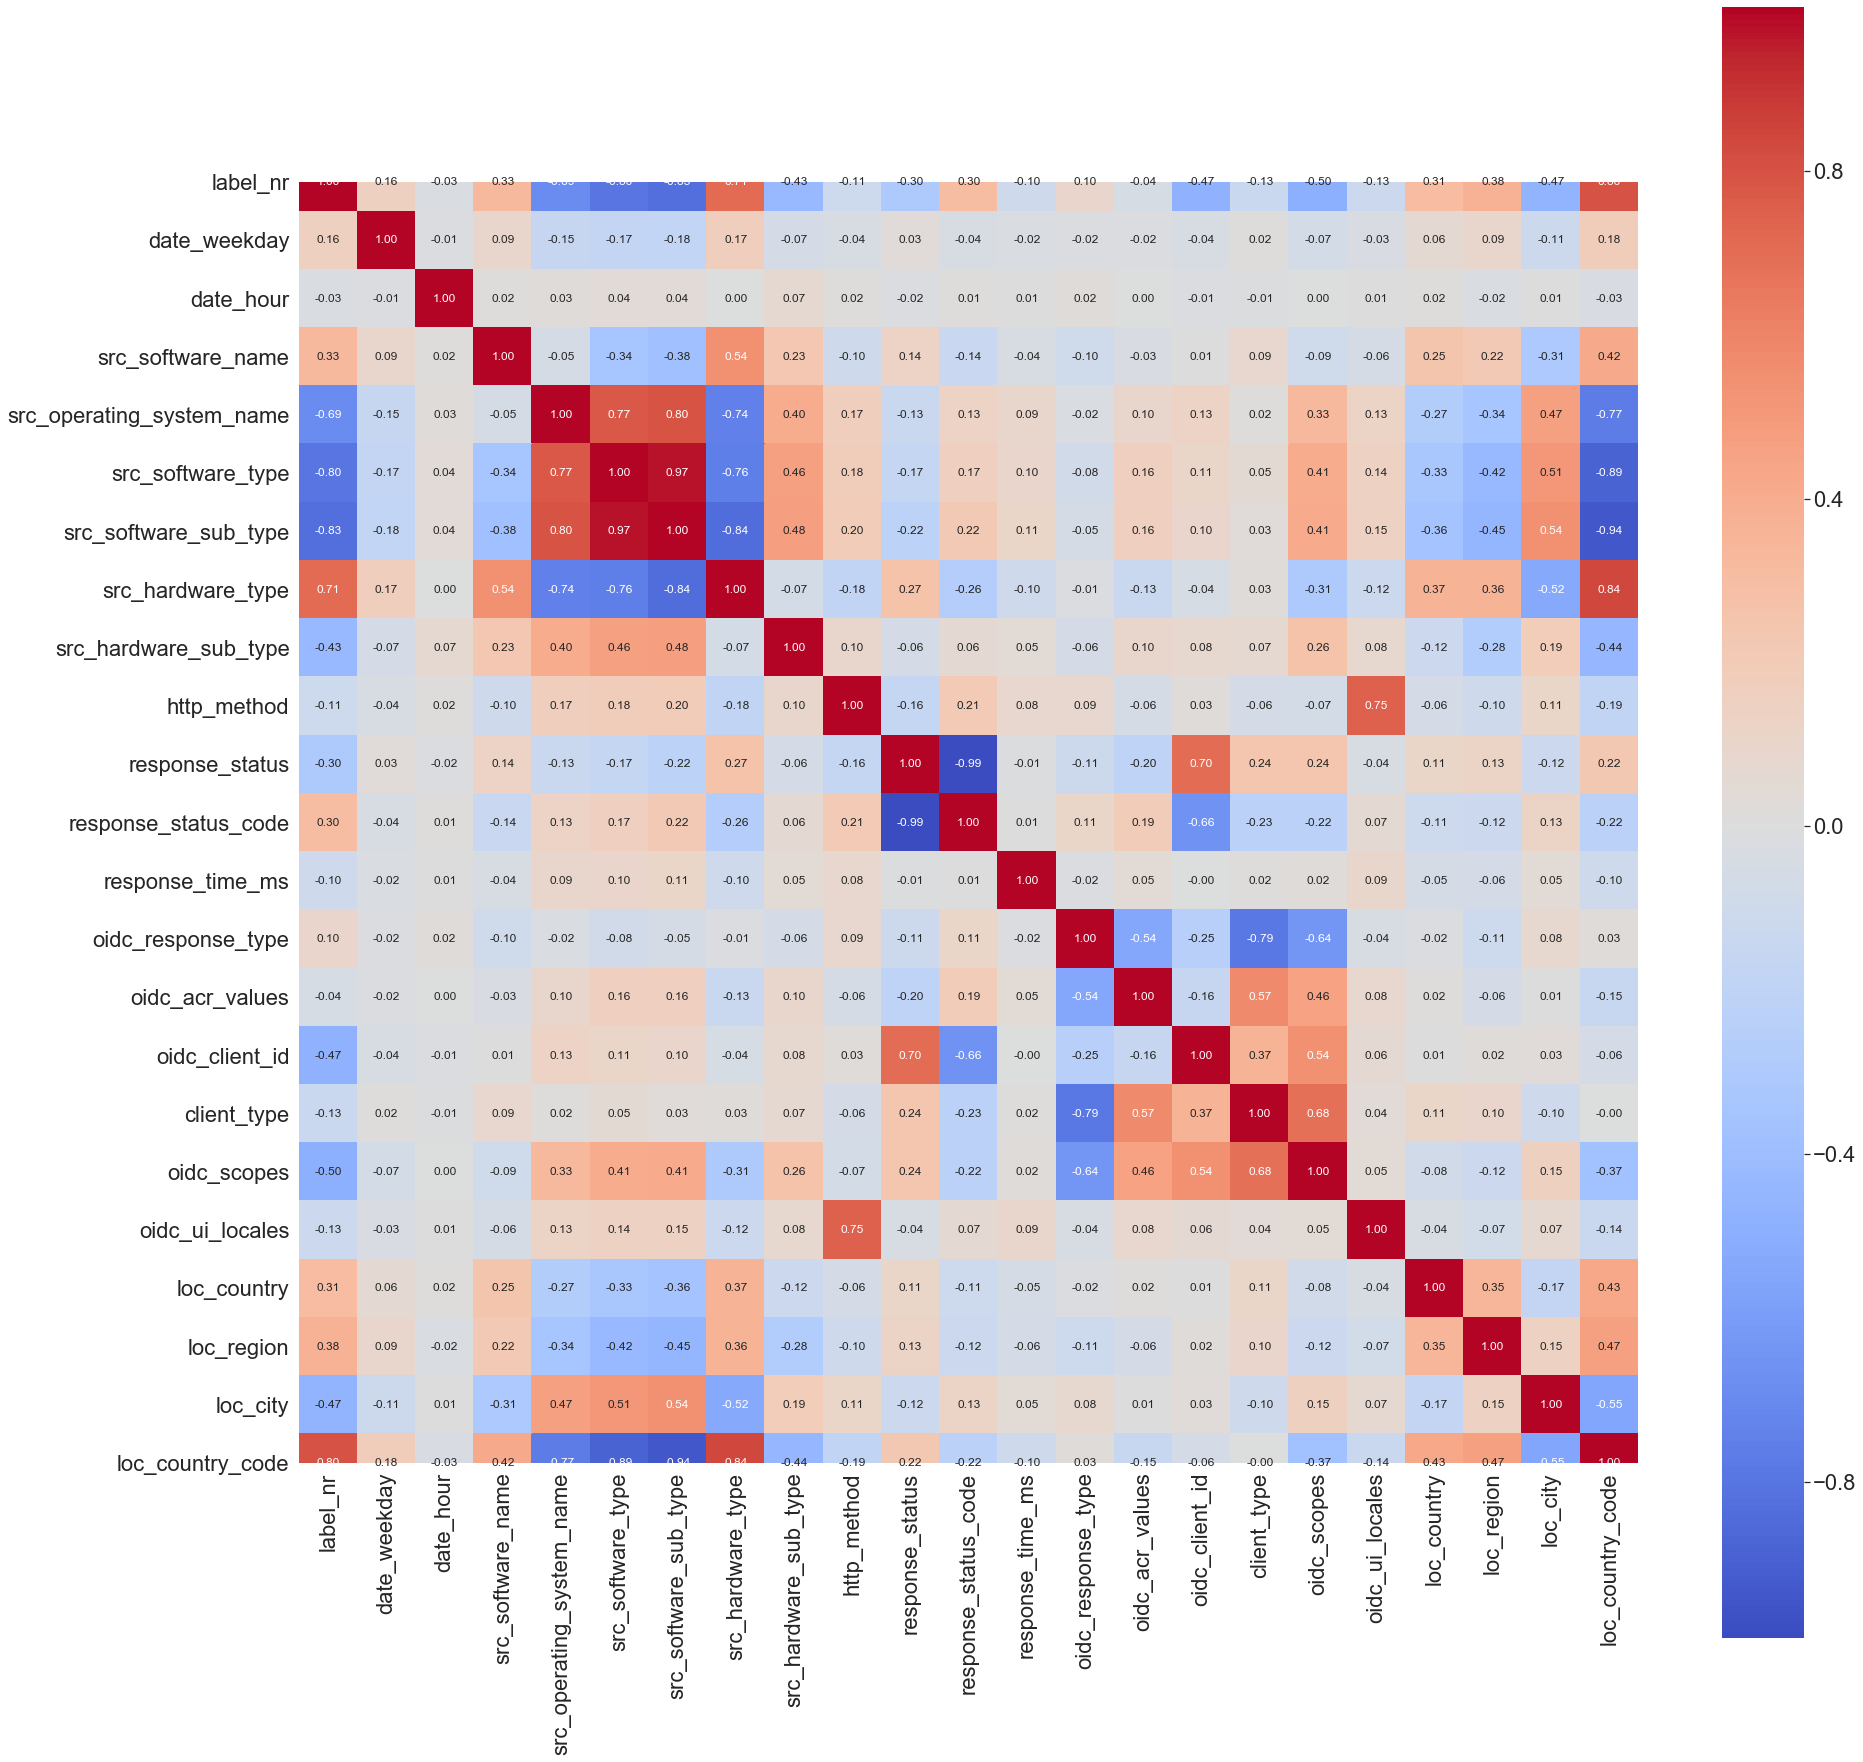

In [11]:
#cmap='coolwarm'

plt.figure(figsize=(30,30))
sns.set(font_scale=2.0)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                
                 yticklabels=sample_df.columns,
                 xticklabels=sample_df.columns)
#plt.title('Covariance matrix showing correlation coefficients', size = 28)
#plt.tight_layout()
plt.show()